#顔認識を行う

OpenCVではHaar-like特徴分類器と呼ばれる学習機械を用いて顔認証を行う
Haar-like特徴分類器についてはこちらが参考になった（https://www.pro-s.co.jp/engineerblog/opencv/post_6231.html）
    
本来は膨大な顔データを学習機械に学習させるが、すでにOpenCVに学習済みの特徴データが用意されている。


雑誌には下記に置いてあるとのことだが、自分の環境では違った
<ユーザーフォルダー>\Anaconda3\pkgs\opencv3-3.1.0-py35_0\Library\etc\haarcascades

C:\dev\opencv-3.1.0\build\etc\haarcascades

顔の座標= 60 57 58 58


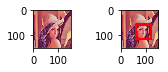

In [18]:
#coding:utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import cv2


#デバッグコード
#from IPython.core.debugger import Pdb; Pdb().set_trace()

cascade_file = "haarcascade_frontalface_alt.xml"
image_file = "Lenna.jpg"


#画像の読み込みとグレースケール化　--- (1)
img = cv2.imread(image_file)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#顔認識を実行---(2)
cascade = cv2.CascadeClassifier(cascade_file)
face_list = cascade.detectMultiScale(img_gray,minSize=(50,50))


if len(face_list) == 0:
    print("顔認識に失敗")
    quit()
    
    
#認識した顔の部分に赤色の枠を描画---(3)
for(x,y,w,h) in face_list:
    print("顔の座標=",x,y,w,h)
    color = (0,0,255)
    pen_w = 8
    cv2.rectangle(img,(x,y),(x+w,y+h),color,thickness= pen_w)
    
#結果の画像を書き出す---(4)
cv2.imwrite("face.jpg",img)


#画像を表示


img1 = np.array(Image.open(image_file))
img2 = np.array(Image.open("face.jpg"))
plt.subplot(5, 4, 1)
plt.imshow(img1)

plt.subplot(5, 4, 2)
plt.imshow(img2)



